# Lab 6: Iris Classification

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

In [4]:
# Columns are sepal length, sepal width, petal length, petal width

In [3]:
df.head()

0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa

In [5]:
df.columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"]

In [7]:
df.head()

Sepal Length  Sepal Width  Petal Length  Petal Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df["Class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [10]:
df.describe()

Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [11]:
# Separate features and targets to X and y 
X = df.iloc[:, 0:4]
y = df.iloc[:, 4]

In [12]:
# Split the datasets into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
y_train=="Iris-virginica"

60     False
116     True
144     True
119     True
108     True
       ...  
9      False
103     True
67     False
117     True
47     False
Name: Class, Length: 105, dtype: bool

## Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [15]:
colors = ['red', 'green', 'blue']
targets = {0: "Iris-setosa", 1: "Iris-virginica", 2: "Iris-versicolor"}

C:\Users\avyudaya\AppData\Local\Temp\ipykernel_14436\3860437645.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


<Axes: >

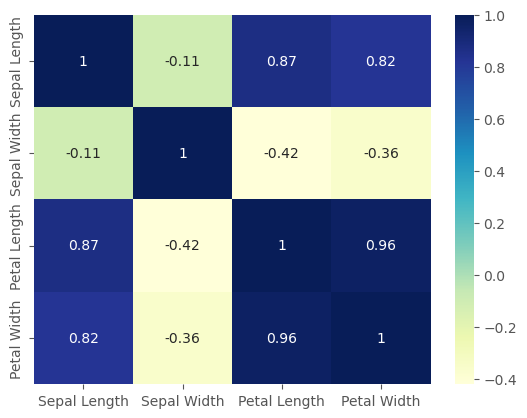

In [16]:
#sns.pairplot(df, hue="Class")
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Text(0, 0.5, 'Sepal width')

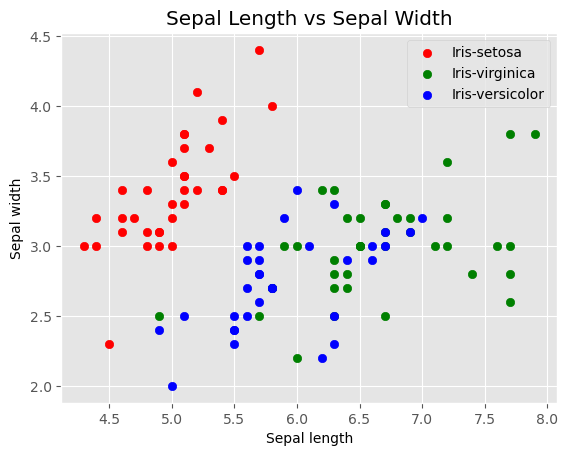

In [17]:
# Sepal length vs Sepal width 
for i in range(len(colors)):
 sepal_length = X_train.iloc[:, 0][y_train==targets[i]]
 sepal_width = X_train.iloc[:, 1][y_train==targets[i]]
 plt.scatter(sepal_length, sepal_width, color=colors[i], label=targets[i])
plt.legend()
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Text(0, 0.5, 'Petal width')

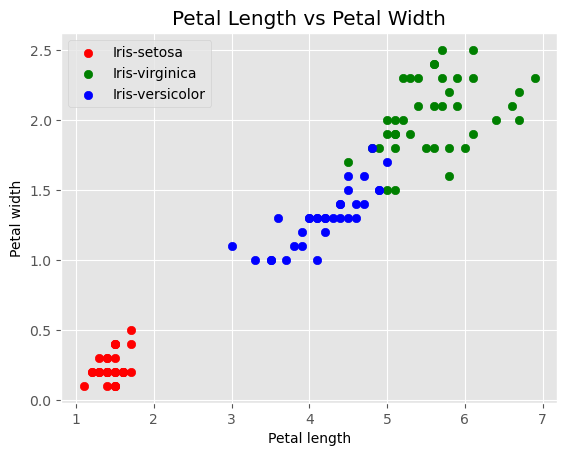

In [19]:
# Petal length vs petal width
for i in range(len(colors)):
 x = X_train.iloc[:, 2][y_train==targets[i]]
 y = X_train.iloc[:, 3][y_train==targets[i]]
 plt.scatter(x, y, color=colors[i], label=targets[i])
plt.legend()
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

## Modeling

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression(multi_class='auto', random_state=88)

In [22]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=88)

In [23]:
y_pred = clf.predict(X_text)

In [24]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [25]:
results = pd.DataFrame({"Actual_Value": y_test, "Predicted_Value": y_pred})

In [26]:
results

Actual_Value  Predicted_Value
114   Iris-virginica   Iris-virginica
62   Iris-versicolor  Iris-versicolor
33       Iris-setosa      Iris-setosa
107   Iris-virginica   Iris-virginica
7        Iris-setosa      Iris-setosa
100   Iris-virginica   Iris-virginica
40       Iris-setosa      Iris-setosa
86   Iris-versicolor  Iris-versicolor
76   Iris-versicolor  Iris-versicolor
71   Iris-versicolor  Iris-versicolor
134   Iris-virginica   Iris-virginica
51   Iris-versicolor  Iris-versicolor
73   Iris-versicolor  Iris-versicolor
54   Iris-versicolor  Iris-versicolor
63   Iris-versicolor  Iris-versicolor
37       Iris-setosa      Iris-setosa
78   Iris-versicolor  Iris-versicolor
90   Iris-versicolor  Iris-versicolor
45       Iris-setosa      Iris-setosa
16       Iris-setosa      Iris-setosa
121   Iris-virginica   Iris-virginica
66   Iris-versicolor  Iris-versicolor
24       Iris-setosa      Iris-setosa
8        Iris-setosa      Iris-setosa
126   Iris-virginica   Iris-virginica
22       Iris-setosa      Iris-setosa
44       Iris-setosa      Iris-setosa
97   Iris-versicolor  Iris-versicolor
93   Iris-versicolor  Iris-versicolor
26       Iris-setosa      Iris-setosa
137   Iris-virginica   Iris-virginica
84   Iris-versicolor  Iris-versicolor
27       Iris-setosa      Iris-setosa
127   Iris-virginica   Iris-virginica
132   Iris-virginica   Iris-virginica
59   Iris-versicolor  Iris-versicolor
18       Iris-setosa      Iris-setosa
83   Iris-versicolor   Iris-virginica
61   Iris-versicolor  Iris-versicolor
92   Iris-versicolor  Iris-versicolor
112   Iris-virginica   Iris-virginica
2        Iris-setosa      Iris-setosa
141   Iris-virginica   Iris-virginica
43       Iris-setosa      Iris-setosa
10       Iris-setosa      Iris-setosa

In [27]:
clf.score(X_text, y_test)

0.9777777777777777

In [28]:
clf.score(X_train, y_train)

0.9809523809523809

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [30]:
accuracy_score(y_pred, y_test)

0.9777777777777777

In [31]:
precision_score(y_pred, y_test, average='micro')

0.9777777777777777

In [32]:
recall_score(y_pred, y_test, average='micro')

0.9777777777777777